# Самостоятельное задание 

Сравнените 4 метода обнаружения контуров, проанализируйте и сравните результаты:
- алгоритм Кэнни
- оператор Собеля
- оператор Робертса
- оператор Лапласа

In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [67]:
image = cv2.imread('img/ind1.jpg', 0)

Применение алгоритма Кэнни для обнаружения контуров

In [68]:
canny_edges = cv2.Canny(image, 100, 200)

Применение оператора Собеля для обнаружения контуров

In [69]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

Применение оператора Робертса для обнаружения контуров

In [70]:
ImageCopy = image.copy()

In [71]:
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])
gradient_x = cv2.filter2D(ImageCopy, cv2.CV_64F, kernel_x)
gradient_y = cv2.filter2D(ImageCopy, cv2.CV_64F, kernel_y)

In [72]:
# Вычисление абсолютного значения градиента и его преобразование в uint8
gradient_abs = np.abs(gradient_x) + np.abs(gradient_y)
gradient_abs = np.uint8(gradient_abs)

In [73]:
threshold = 50
ret, roberts = cv2.threshold(gradient_abs, threshold, 255, cv2.THRESH_BINARY)

Применение оператора Лапласа для обнаружения контуров

In [74]:
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

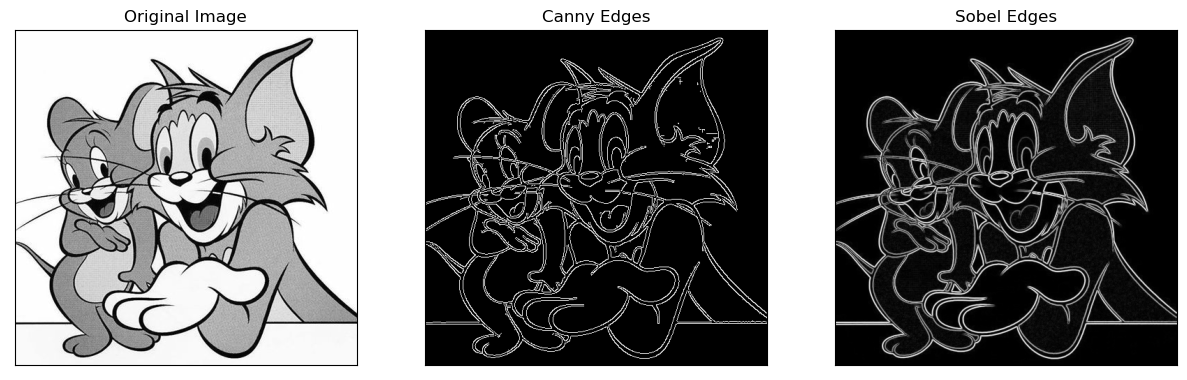

In [75]:
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edges'), plt.xticks([]), plt.yticks([]);

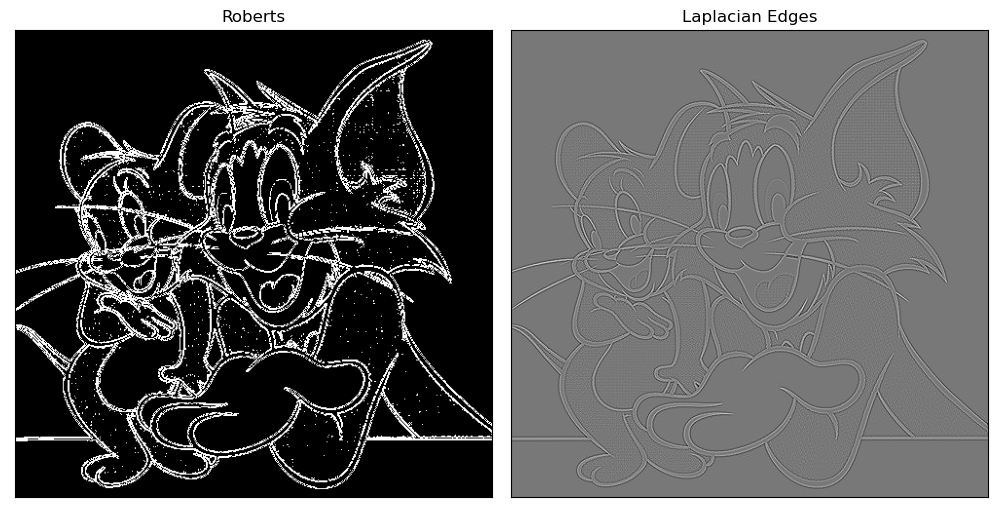

In [76]:
plt.figure(figsize=(15,15))
plt.subplot(132), plt.imshow(roberts, cmap='gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edges'), plt.xticks([]), plt.yticks([]);

plt.tight_layout()
plt.show()

Анализ и сравнение результатов по количеству обнаруженных контуров

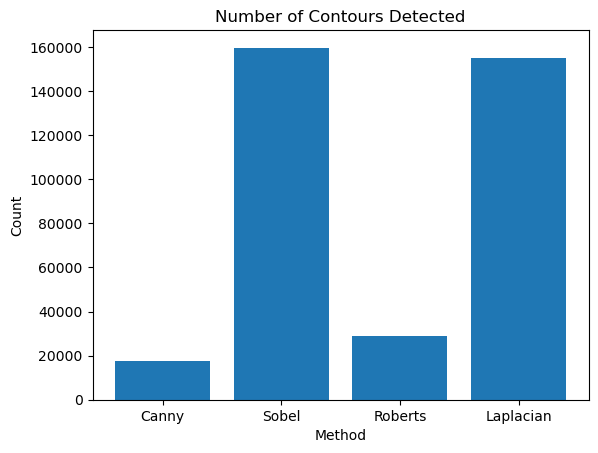

In [77]:
contour_counts = [np.count_nonzero(canny_edges), np.count_nonzero(sobel_edges), 
                  np.count_nonzero(roberts), np.count_nonzero(laplacian_edges)]
method_names = ['Canny', 'Sobel', 'Roberts', 'Laplacian']

plt.bar(method_names, contour_counts)
plt.title('Number of Contours Detected')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()